In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

In [4]:
# Inspect data for null values
if data.isnull().values.any():
    print("Data contains null values. Cleaning...")
    data = data.dropna()

In [5]:
# Convert to numpy array
data = np.array(data)
np.random.shuffle(data)  # Shuffle before splitting into train and dev sets

In [7]:
# Split dataset into development and training sets
m, n = data.shape
data_dev = data[:1000].T
Y_dev = data_dev[0]  # Labels
X_dev = data_dev[1:]  # Features
X_dev = X_dev / 255.0  # Normalize pixel values

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.0
_, m_train = X_train.shape

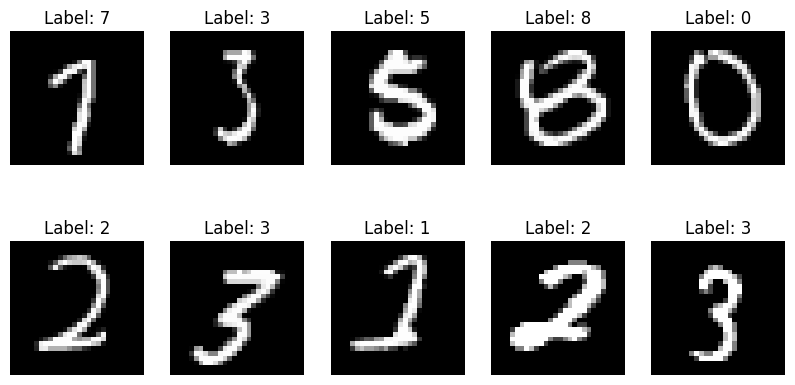

In [8]:
# Visualize sample data
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.show()

In [9]:
# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stability improvement
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivative of ReLU
def ReLU_deriv(Z):
    return Z > 0

# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

[3 1 3 ... 2 1 1] [1 4 6 ... 0 6 8]
[3 1 3 ... 2 1 1] [1 4 6 ... 0 6 8]
0.09324390243902439
Iteration 0: Accuracy = 0.0932
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.6259756097560976
Iteration 100: Accuracy = 0.6260
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.7611707317073171
Iteration 200: Accuracy = 0.7612
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.8103414634146342
Iteration 300: Accuracy = 0.8103
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.8348780487804878
Iteration 400: Accuracy = 0.8349
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.8511219512195122
Iteration 500: Accuracy = 0.8511
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.8628048780487805
Iteration 600: Accuracy = 0.8628
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
[1 4 2 ... 0 6 8] [1 4 6 ... 0 6 8]
0.8708780487804878
Iteration 700: Accuracy = 0.8709
[1 4 6 ..

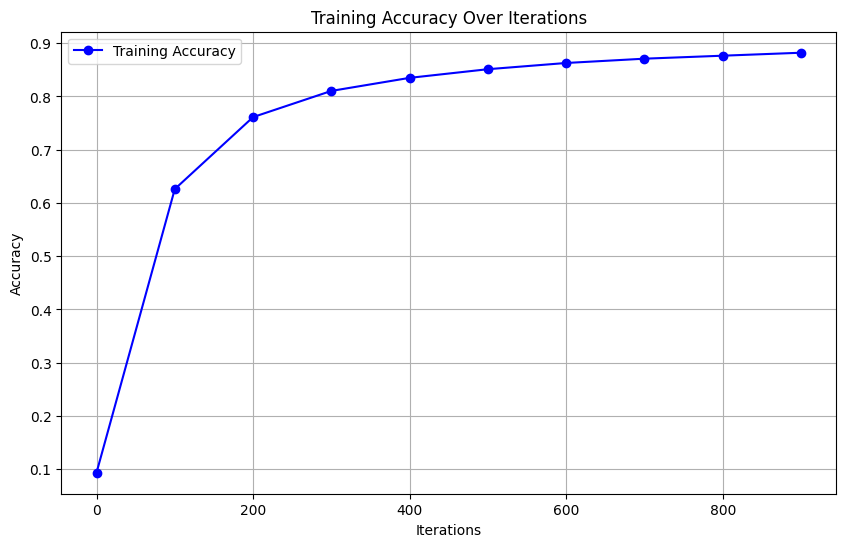

In [21]:
# Predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Training loop
# Training loop with accuracy tracking
def gradient_descent_with_plot(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracies = []  # List to store accuracies
    iterations_list = []  # List to store iteration numbers

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 100 == 0:  # Store accuracy every 100 iterations
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(get_accuracy(predictions, Y))
            accuracies.append(accuracy)
            iterations_list.append(i)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}")
    
    return W1, b1, W2, b2, accuracies, iterations_list

# Train the model and track accuracies
W1, b1, W2, b2, accuracies, iterations_list = gradient_descent_with_plot(
    X_train, Y_train, alpha=0.10, iterations=1000
)

# Plot accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.title("Training Accuracy Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


In [19]:
# Train the model
#W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.10, iterations=1000)

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    """Make predictions using the trained model."""
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_dev_prediction(index, X_dev, Y_dev, W1, b1, W2, b2):
    """
    Test a single example from the development set.
    Visualize the image and display the model's prediction.
    """
    current_image = X_dev[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    # Reshape and visualize the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  2
Label:  2


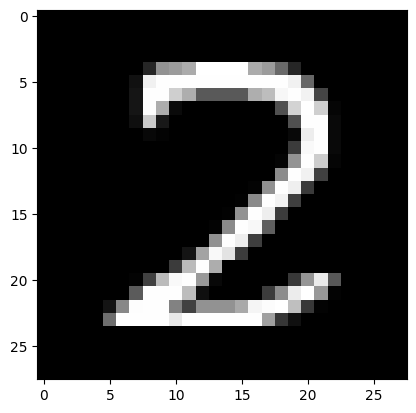

In [15]:
# Example: Test a specific index from the development set
test_dev_prediction(0, X_dev, Y_dev, W1, b1, W2, b2)

Prediction:  4
Label:  4


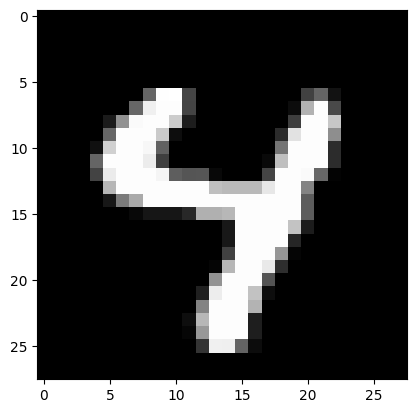

In [16]:
# Example: Test a specific index from the development set
test_dev_prediction(22, X_dev, Y_dev, W1, b1, W2, b2)

Development Set Accuracy: 0.8600


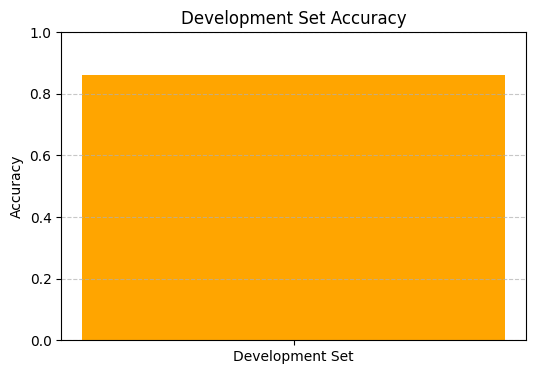

In [18]:
# Evaluate accuracy on the development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
dev_accuracy = get_accuracy(dev_predictions, Y_dev)
print(f"Development Set Accuracy: {dev_accuracy:.4f}")

# Plot bar graph for development set accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Development Set'], [dev_accuracy], color='orange', width=0.4)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title("Development Set Accuracy")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Preprocess the data
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)  # Shuffle before splitting into dev and training sets

# Split into training and development sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.  # Normalize pixel values

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_, m_train = X_train.shape

# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / expZ.sum(axis=0, keepdims=True)

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivatives for backpropagation
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1    
    W2 -= alpha * dW2  
    b2 -= alpha * db2    
    return W1, b1, W2, b2

# Helper functions for predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Gradient descent with accuracy tracking
def gradient_descent(X, Y, X_dev, Y_dev, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    train_accuracies = []
    dev_accuracies = []
    iterations_list = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 100 == 0:
            # Track accuracy for training and development sets
            train_accuracy = get_accuracy(get_predictions(A2), Y)
            dev_accuracy = get_accuracy(make_predictions(X_dev, W1, b1, W2, b2), Y_dev)
            
            train_accuracies.append(train_accuracy)
            dev_accuracies.append(dev_accuracy)
            iterations_list.append(i)
            
            print(f"Iteration {i}: Training Accuracy = {train_accuracy:.4f}, Development Accuracy = {dev_accuracy:.4f}")
    
    return W1, b1, W2, b2, train_accuracies, dev_accuracies, iterations_list

# Train the model and track accuracies
W1, b1, W2, b2, train_accuracies, dev_accuracies, iterations_list = gradient_descent(
    X_train, Y_train, X_dev, Y_dev, alpha=0.10, iterations=1000
)

# Plot training and development accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations_list, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(iterations_list, dev_accuracies, label="Development Accuracy", marker='x')
plt.title("Accuracy Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
"""

'\nimport numpy as np\nimport pandas as pd\nfrom matplotlib import pyplot as plt\n\n# Load the data\ndata = pd.read_csv(\'/kaggle/input/digit-recognizer/train.csv\')\n\n# Preprocess the data\ndata = np.array(data)\nm, n = data.shape\nnp.random.shuffle(data)  # Shuffle before splitting into dev and training sets\n\n# Split into training and development sets\ndata_dev = data[0:1000].T\nY_dev = data_dev[0]\nX_dev = data_dev[1:n] / 255.  # Normalize pixel values\n\ndata_train = data[1000:m].T\nY_train = data_train[0]\nX_train = data_train[1:n] / 255.\n_, m_train = X_train.shape\n\n# Initialize parameters\ndef init_params():\n    W1 = np.random.rand(10, 784) - 0.5\n    b1 = np.random.rand(10, 1) - 0.5\n    W2 = np.random.rand(10, 10) - 0.5\n    b2 = np.random.rand(10, 1) - 0.5\n    return W1, b1, W2, b2\n\n# Activation functions\ndef ReLU(Z):\n    return np.maximum(Z, 0)\n\ndef softmax(Z):\n    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))\n    return expZ / expZ.sum(axis=0, keepdims=